## Regresi Linear

In [1]:
# import library pandas
import pandas as pd

In [2]:
# membaca dataset dari file csv
data = pd.read_csv('R02_rice_field.csv')

In [3]:
# menampilkan dataset dalam format table
data

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


In [4]:
# menampilkan 5 data teratas
data.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


In [5]:
# Informasi terkait dataset (null, tipe data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production (X)    224 non-null    float64
 1   Harvest Area (Y)  224 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


In [6]:
# Statistik deskriptif dataset
data.describe()

,Production (X),Harvest Area (Y)
count,2.240000e+02,224.000000
mean,1.679701e+06,374349.966920
std,1.161387e+06,232751.161987
min,4.293800e+04,63142.040000
25%,5.488570e+05,146919.500000
50%,1.667773e+06,373551.500000
75%,2.436851e+06,514570.250000
max,4.881089e+06,872737.000000


### KORELASI


In [7]:
# Menghitung matriks korelasi antar kolom
data.corr()

,Production (X),Harvest Area (Y)
Production (X),1.000000,0.905622
Harvest Area (Y),0.905622,1.000000


### SPLIT DATA

In [8]:
# Import library numpy
import numpy as np
# Menyiapkan data untuk training (mengekstrak kolom sebagai variabel input dan output)
x_train1 = data['Production (X)'].values[:, np.newaxis]
y_train1 = data['Harvest Area (Y)'].values

### MODELLING

In [9]:
# Import model Regresi Linear dari scikit-learn
from sklearn.linear_model import LinearRegression
# Inisialisasi model Regresi Linear
model1 = LinearRegression()
# Melatih model menggunakan data training
model1.fit(x_train1, y_train1)

LinearRegression()

### TESTING

In [10]:
# Menyiapkan data untuk pengujian (dua nilai Production (X))
x_train1_test = [[300000],[200000]]
# Melakukan prediksi Harvest Area menggunakan model yang sudah dilatih
pred_HarvestArea = model1.predict(x_train1_test)

# Menampilkan prediksi Harvest Area
print("Prediksi Harvest Area : ", pred_HarvestArea)

Prediksi Harvest Area :  [123942.81308465 105793.43330058]


In [11]:
# Rumus Regresi -> y = ax + b (a = koefisien, b = intercept)
# Menampilkan koefisien dan intercept dari model
print("Koefisien : ", model1.coef_)
print("Intercept : ", model1.intercept_)

Koefisien :  [0.1814938]
Intercept :  69494.6737324429


In [12]:
# testing rumus
# Menghitung nilai menggunakan rumus Regresi Linear untuk verifikasi
y = model1.coef_ * 29 + model1.intercept_
print(y)

[69499.93705258]


### VISUALISASI

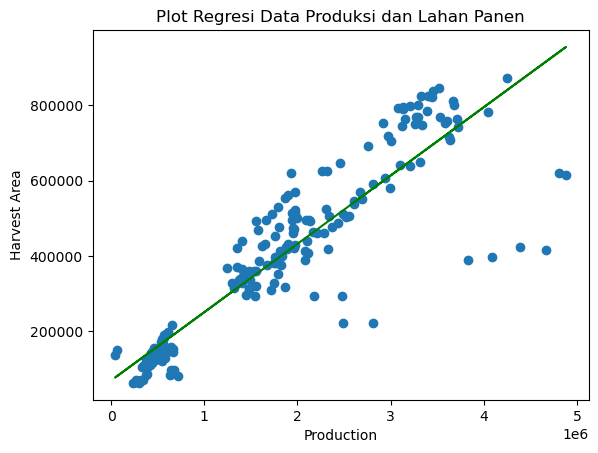

In [13]:
# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# Melakukan prediksi Harvest Area untuk seluruh data Production (X)
prediksi_HarvestArea = model1.predict(x_train1)
# Membuat dataframe baru untuk hasil prediksi
dataframe_baru = pd.DataFrame({'Production_X': data['Production (X)'], 'Harvest_Area_Y': prediksi_HarvestArea})

# Plot scatter plot dan garis regresi
plt.scatter(data['Production (X)'], data['Harvest Area (Y)'])
plt.plot(dataframe_baru['Production_X'], dataframe_baru['Harvest_Area_Y'], color="green")
plt.xlabel('Production')
plt.ylabel('Harvest Area')
plt.title('Plot Regresi Data Produksi dan Lahan Panen')
plt.show()